# TEST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import time
import math
import matplotlib as mp
import scipy as sp
import pylab as py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd

In [3]:
from ipynb.fs.full.Neutron_Star_SPH_sph import W, gradW, getPairwiseSeparations, getDensity
from ipynb.fs.full.Neutron_Star_SPH_eos import *
from ipynb.fs.full.Neutron_Star_SPH_NS import *
from ipynb.fs.full.NS_dynamics import *

In [4]:
# Initialize Neutron Star Objects
M1 = 0.5
M2 = 0.5
R1 = 1
R2 = 1

eos = EOS('standard')
star_1 = NS("star_1", eos,M1,R1)
star_2 = NS("star_2", eos,M2,R2)

star1_com = [-10,-10,-10] # km 
star2_com = [-100,-1,1] # km 
star1_com_velocity = [10,20,30] # km/s 
star2_com_velocity = [0,40,0] # km/s

star_1.move_com(star1_com) # move the stars to their initial locations
star_2.move_com(star2_com) 

r = get_r(star1_com,star2_com) # gravitational force
f = grav_force(M1, M2,r)

# =================== Simulation Specs for the animation ================== # 
end_time = 1e7/1000 # amount of time that the simulation runs (seconds)
time_per_timestep = 1 # the amount of time, in seconds, that goes by in 1 timestep.
EndTimeStep = end_time/time_per_timestep # number of timesteps of the animation
print("sucessfully initialized stars!")

-------success!
 
STAR OBJECT. Name: 'star_1', Mass: 0.5 SMs, Radius: 1 km 

-------success!
 
STAR OBJECT. Name: 'star_2', Mass: 0.5 SMs, Radius: 1 km 

sucessfully initialized stars!


In [ ]:
"""
This is the part that is not right, but the goalof this block is 
to produce two numpy arrays containing the center of mass positions. 

COM_DATA_star1 = numpy array containing star 1 center of mass positions
COM_DATA_star2 = numpy array containing star 2 center of mass positions

"""
# ==============================================================
# time array
time = np.arange(0, 480, 0.5)

# body m1 initial conditions
m1 = M1*2e30  # mass (kg)
r10 = np.array(star1_com)  # initial position (km)
v10 = np.array(star1_com_velocity)  # initial velocity (km/s)

# body m2 initial conditions
m2 = M2*2e30  # mass (kg)
r20 = np.array(star2_com)  # initial position (km)
v20 = np.array(star2_com_velocity)  # initial velocity (km/s)
# ==============================================================
# propagate state
N_ = 1000 # timesteps
dt_ = 0.1 # seconds

# simulation results
x1,x2,y1,y2,z1,z2,vx1,vx2,vy1,vy2,vz1,vz2 = leapfrogintegrate(0,0, r10, r20, v10, v20, m1, m2,N=N_,dt = dt_)

COM_DATA_star1 = np.concatenate((x1,y1,z1))
COM_DATA_star2 = np.concatenate((x2,y2,z2))

Sucessfully updated and stored star locations.

Sucessfully made plotting dataframe: 

            time          x          y          z
0            0.0  -9.774197  -9.931212  -9.808120
1            0.0  -9.639061 -10.045259 -10.001203
2            0.0  -9.663437  -9.792500 -10.107379
3            0.0  -9.863032 -10.051771 -10.092461
4            0.0  -9.954110 -10.357047 -10.384088
...          ...        ...        ...        ...
6000595  10000.0 -99.618300  -0.961908   0.896455
6000596  10000.0 -99.780903  -0.697705   1.111279
6000597  10000.0 -99.901021  -0.720705   1.269787
6000598  10000.0 -99.684648  -0.892159   0.987672
6000599  10000.0 -99.867429  -0.685720   0.729750

[6000600 rows x 4 columns]


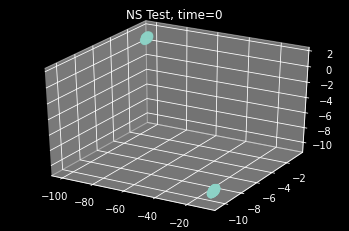

In [5]:
# ============== Takes in a list of center of mass positions ============== #


star1_list = [star1_com for i in range(int(EndTimeStep))] # Todo !!!  This is a placeholder value and should come from the above block
star2_list = [star2_com for i in range(int(EndTimeStep))] # Todo !!!

if len(star1_list) != int(EndTimeStep):
    raise ValueError("List of center of mass positions for the first star does not match number of timesteps")
if len(star2_list) != int(EndTimeStep):
    raise ValueError("List of center of mass positions for the second star does not match number of timesteps")
if len(star1_list[0]) != 3:
    raise ValueError("Center of mass coordinates must have dimension 3")
if len(star2_list[0]) != 3:
    raise ValueError("Center of mass coordinates must have dimension 3")
# ========================================================================= # 
# The next few blocks creates an animation with the two stars in 3D.

star1_pos = star_1.getPosition()
star2_pos = star_2.getPosition()
a = np.concatenate((star1_pos,star2_pos)) # start off array of points with just the initial star locations.

# Update the Neutron Star points locations...
for t in range(int(EndTimeStep)): # for every timestep in the simulation
        # -- 0. Update the location of the center of mass -- #
    star_1.move_com(star1_com) # move the stars to their COM locations
    star_2.move_com(star2_com)
        # -- 1. update the force on the center of mass -- #
    star_1.modify_com_force(f) # The center of masses of the points experience increasing forces in opposite directions.
    star_2.modify_com_force([-1*i for i in f]) # 
        # -- 2. update the positions, velocities, and accelerations for this timestep. -- #
    pos1 = star_1.getPosition() # just updating the point locations for now.
    pos2 = star_2.getPosition()
    ### Output Current Star Point positions to pandas dataframe for plotting
    a = np.concatenate((a,pos1)) # add the new star positions for this timestep to the outputed data array for star 1
    a = np.concatenate((a,pos2))# add the new star positions for this timestep to the outputed data array for star 2
    
print("Sucessfully updated and stored star locations.")

num_points1 = star_1.num_points 
num_points2 = star_2.num_points
points_per_timestep = num_points1 + num_points2 # we need to assign the first set of points, (num_points1 + num_points2) points to the same timestep in the movie

points_count = len(a) # Total number of points in the entire simulation
t = np.array([np.ones(points_per_timestep)*i for i in range(int(points_count/points_per_timestep))]).flatten() # an array counting from 0 to 19. Each number repeats 100 times.
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})
print("\nSucessfully made plotting dataframe: \n")
print(df)

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('NS Test, time={}'.format(num))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('NS Test')
data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)
ani = matplotlib.animation.FuncAnimation(fig, update_graph, int(EndTimeStep), interval=10, blit=False)
plt.show()

Sucessfully updated and stored star locations.

Sucessfully made plotting dataframe: 

            time          x          y          z
0            0.0  -9.774197  -9.931212  -9.808120
1            0.0  -9.639061 -10.045259 -10.001203
2            0.0  -9.663437  -9.792500 -10.107379
3            0.0  -9.863032 -10.051771 -10.092461
4            0.0  -9.954110 -10.357047 -10.384088
...          ...        ...        ...        ...
6000595  10000.0 -99.618300  -0.961908   0.896455
6000596  10000.0 -99.780903  -0.697705   1.111279
6000597  10000.0 -99.901021  -0.720705   1.269787
6000598  10000.0 -99.684648  -0.892159   0.987672
6000599  10000.0 -99.867429  -0.685720   0.729750

[6000600 rows x 4 columns]


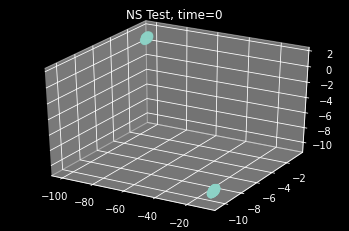

In [6]:
# ============== Takes in a list of center of mass positions ============== #


star1_list, star2_list, com = orbit(star_1, star_2, 2e10)

if len(star1_list) != int(EndTimeStep):
    raise ValueError("List of center of mass positions for the first star does not match number of timesteps")
if len(star2_list) != int(EndTimeStep):
    raise ValueError("List of center of mass positions for the second star does not match number of timesteps")
if len(star1_list[0]) != 3:
    raise ValueError("Center of mass coordinates must have dimension 3")
if len(star2_list[0]) != 3:
    raise ValueError("Center of mass coordinates must have dimension 3")
# ========================================================================= # 
# The next few blocks creates an animation with the two stars in 3D.

star1_pos = star_1.getPosition()
star2_pos = star_2.getPosition()
a = np.concatenate((star1_pos,star2_pos)) # start off array of points with just the initial star locations.

# Update the Neutron Star points locations...
for t in range(int(EndTimeStep)): # for every timestep in the simulation
        # -- 0. Update the location of the center of mass -- #
    star_1.move_com(star1_com) # move the stars to their COM locations
    star_2.move_com(star2_com)
        # -- 1. update the force on the center of mass -- #
    star_1.modify_com_force(f) # The center of masses of the points experience increasing forces in opposite directions.
    star_2.modify_com_force([-1*i for i in f]) # 
        # -- 2. update the positions, velocities, and accelerations for this timestep. -- #
    pos1 = star_1.getPosition() # just updating the point locations for now.
    pos2 = star_2.getPosition()
    ### Output Current Star Point positions to pandas dataframe for plotting
    a = np.concatenate((a,pos1)) # add the new star positions for this timestep to the outputed data array for star 1
    a = np.concatenate((a,pos2))# add the new star positions for this timestep to the outputed data array for star 2
    
print("Sucessfully updated and stored star locations.")

num_points1 = star_1.num_points 
num_points2 = star_2.num_points
points_per_timestep = num_points1 + num_points2 # we need to assign the first set of points, (num_points1 + num_points2) points to the same timestep in the movie

points_count = len(a) # Total number of points in the entire simulation
t = np.array([np.ones(points_per_timestep)*i for i in range(int(points_count/points_per_timestep))]).flatten() # an array counting from 0 to 19. Each number repeats 100 times.
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})
print("\nSucessfully made plotting dataframe: \n")
print(df)

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('NS Test, time={}'.format(num))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('NS Test')
data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)
ani = matplotlib.animation.FuncAnimation(fig, update_graph, int(EndTimeStep), interval=10, blit=False)
plt.show()

In [ ]:
ani.save("ns-test-.mp4")
print("Saved animation.")

# *****___*Testing before April 20th****___

# Neutron Star plot Animation 

In [ ]:
# Initialize Neutron Star Objects

eos = EOS('standard')
star_1 = NS("star_1", stdEOS,0.5,0.5)
star_2 = NS("star_2", stdEOS,0.5,0.5)
star_2.pos += 400

# The goal of this is to create an animation with two stars in 3D, moving.


In [ ]:
EndTime = 20

num_points1 = star_1.num_points
num_points2 = star_2.num_points

a = np.concatenate((star_1.pos,star_2.pos)) # start off array of points with just the initial star locations.
# add new star positions
L = [star_1.pos+5,star_2.pos-5, star_1.pos+10,star_2.pos-10,star_1.pos+15,star_2.pos-15,star_1.pos+20,star_2.pos-20]
for l in L:
    a = np.concatenate((a,l)) # Array of data to plot. len(a) by 3 dimensions.

In [ ]:
points_count = len(a) # Total number of points in the entire simulation
points_per_timestep = num_points1 + num_points2# we need to assign the first set of points, (num_points1 + num_points2) points to the same timestep in the movie
t = np.array([np.ones(points_per_timestep)*i for i in range(int(points_count/points_per_timestep))]).flatten() # an array counting from 0 to 19. Each number repeats 100 times.
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('NS Test')
data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)
ani = matplotlib.animation.FuncAnimation(fig, update_graph, EndTime, 
                               interval=10, blit=False)
plt.show()
print(df)

In [ ]:
ani.save("ns-test.mp4") # Save animation

# *****___*Testing before April 16th****___

### INITIALIZE STAR / EOS OBJECTS 

In [ ]:
Tag1 = "NS1"
Tag2 = "NS2"

stdEOS = EOS('standard') # create an equation of state object
eos_name = stdEOS.notes
print(eos_name + "\n")

myNS = NS(Tag1, stdEOS,0.5,0.5)
myNS2 = NS(Tag2, stdEOS,2,0.5) # double the mass and radius of the first star

# for plots
ns1 = [myNS]
ns2 = [myNS2]
both = [myNS, myNS2]

# Test Plotting of 2 stars

In [ ]:
stars = both # choose which stars you want to plot
dt = 0.05
T = 1
acc = 5
for timestep in range(int(T/dt)):
    ns2[0].shift(acc) # shifting the star at each timestep
    plot(both, 7,7)

### Save Results/Make Code File Structure

In [ ]:
prev_date = "Apr8" # CHANGE WHEN YOU ARE DONE FOR THE DAY
### SAVE RESULTS ### 
############################################
############################################
date = "Apr11"
test_name = "Ns_test"
testnumber = "1"  # use this to distingush multiple test runs of the same thing
description = "acc10test"
lastvisited = "Apr9" # update to today after you exit this code for the day. 

### Advanced settings
include_mass_radius = False
include_points = True
include_date = True
Final_Results = False # Only switch this on if you are producing a nice, final plot. 
############################################
############################################
description = description + testnumber
file_loc = "test_results/"

if date == lastvisited:
    raise ValueError("\n************************\nWarning: You may have the wrong date. To prevent saving images to the wrong folder, please create a new folder and update to today's date.\n************************\n")
    
### Add values onto the name of the file 
for i in stars:
    pts = ""
    if include_points:
        pts = str(i.num_points)
    if include_mass_radius:
        star_names = [i.tag + "_m" + str(i.mass)  + "_r"+ str(i.radius) +"-"+ pts for i in stars]    
    else:
        star_names = [i.tag + "-" + str(i.num_points) for i in stars]

star_names = "__".join(star_names)
star_names = star_names + "--" + description
if Final_Results: 
    file_loc = 'final_results/'
    description = description + '_final'
date_ = date
if not include_date: 
    date_ = ""
print("\n\nCURRENT FOLDER NAME: ", file_loc+date + "/" + star_names)
print("\n run the codeblock below to save the plots")

In [ ]:
#### Copy and paste your working code from 1a and uncomment this line
# plt.savefig(file_loc + date + "/" + star_names + "/"+ test_name + date + '_' + str(timestep) + ".png")

dt = 0.05
T = 1
acc = 10
for timestep in range(int(T/dt)):
    ns2[0].shift(acc) # shifting the star at each timestep
    plot(both, 7,7)
    plt.savefig(file_loc + date + "/" + star_names + "/"+ test_name + date_ + '_' + str(timestep) + ".png")

# Working Animation Code

In [4]:
# Initialize points

eos = EOS('standard')
star_1 = NS("star_1",0.5,0.5)
star_2 = NS("star_2",0.5,0.5)
star_2.pos += 400

# The goal of this is to create an animation with two stars in 3D, moving.
EndTime = 20

num_points1 = star_1.num_points
num_points2 = star_2.num_points

a = np.concatenate((star_1.pos,star_2.pos)) # start off array of points with just the initial star locations.
# add new star positions
L = [star_1.pos+5,star_2.pos-5, star_1.pos+10,star_2.pos-10,star_1.pos+15,star_2.pos-15,star_1.pos+20,star_2.pos-20]
for l in L:
    a = np.concatenate((a,l)) # Array of data to plot. len(a) by 3 dimensions.

points_count = len(a) # Total number of points in the entire simulation
points_per_timestep = num_points1 + num_points2# we need to assign the first set of points, (num_points1 + num_points2) points to the same timestep in the movie
t = np.array([np.ones(points_per_timestep)*i for i in range(int(points_count/points_per_timestep))]).flatten() # an array counting from 0 to 19. Each number repeats 100 times.
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('NS Test')
data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z)
ani = matplotlib.animation.FuncAnimation(fig, update_graph, EndTime, 
                               interval=10, blit=False)
plt.show()
print(df)

AttributeError: 'float' object has no attribute 'P'

In [ ]:
ani.save("working_animation_code-ns-test.mp4") # Save animation

In [ ]:
# def plot(stars,x_lim = 50, y_lim = 50,fig_size=(4,5), dpi_ = 300, gridspecs=[3,1], fig=None, ax=None, density_plot = False):
#     """ Takes in any number of stas and plots their points. """
#     if fig == None: 
#         fig = plt.figure(figsize=fig_size, dpi=dpi_)
#         grid = plt.GridSpec(gridspecs[0], gridspecs[1], wspace=0.0, hspace=0.3)
#     if ax == None:
#         ax1 = plt.subplot(grid[0:2,0])
#         if density_plot:
#             ax2 = plt.subplot(grid[2,0])# for second plot
            
#     plt.sca(ax1)
#     plt.cla()
#     title = ""
#     for i in range(len(stars)):
#         star = stars[i]
#         pos = star.pos
#         rho = star.rho
#         cval = np.minimum((rho-3)/3,1).flatten()
#         plt.scatter(pos[:,0],pos[:,1], c=cval, cmap=plt.cm.autumn, s=10, alpha=0.5)
#         title = title + str(star)
        
#     ax1.set(xlim=(-x_lim, x_lim), ylim=(-y_lim, y_lim))
#     ax1.set_aspect('equal', 'box')
#     ax1.set_facecolor('black')
#     ax1.set_facecolor((.1,.1,.1))

#     plt.title(str(title))
#     plt.xlabel("km")
#     plt.ylabel("km")
#     return None


# def plot_update_Erin(stars, x_lim = 50, y_lim = 50,fig_size=(4,5), dpi_ = 300, gridspecs=[3,1], fig=None, ax=None, density_plot = False):
#     """ Takes in any number of stas and plots their points. """
#     if fig == None: 
#         fig = plt.figure(figsize=fig_size, dpi=dpi_)
#         grid = plt.GridSpec(gridspecs[0], gridspecs[1], wspace=0.0, hspace=0.3)
#     if ax == None:
#         ax1 = plt.subplot(grid[0:2,0])
#         if density_plot:
#             ax2 = plt.subplot(grid[2,0])# for second plot
#     else:
#         ax1=ax

        
#     rr = np.zeros((100,3))
#     rlin = np.linspace(0,1,100)
#     rr[:,0] =rlin
#     plt.sca(ax1)
#     plt.cla()
#     title = ""
#     for i in range(len(stars)):
#         star = stars[i]
#         pos = star.pos[:]
#         rho = star.rho
#         cval = np.minimum((rho-3)/3,1).flatten()
#         plt.scatter(pos[:,0],pos[:,1], c=cval, cmap=plt.cm.autumn, s=10, alpha=0.5)
#         title = title + str(star)
        
#     ax1.set(xlim=(-x_lim, x_lim), ylim=(-y_lim, y_lim))
#     ax1.set_aspect('equal', 'box')
#     ax1.set_facecolor('black')
#     ax1.set_facecolor((.1,.1,.1))

#     plt.title(str(title))
#     plt.xlabel("km")
#     plt.ylabel("km")
    
# # # density plot
# #     rho_analytic = lmbda/(4*k) * (R**2 - rlin**2)
# #     if density_plot:
# #         plt.sca(ax2)
# #         plt.cla()
# #         ax2.set(xlim=(0, 1), ylim=(0, 3))
# #         ax2.set_aspect(0.1)
# #         plt.plot(rlin, rho_analytic, color='gray', linewidth=2)
# #         rho_radial = getDensity( rr, pos, m, h )
# #         plt.plot(rlin, rho_radial, color='blue')
# #         plt.pause(0.001)
#     return None


# Saved the code from the density plot, in case we want to use it. 

# # density plot
#     rho_analytic = lmbda/(4*k) * (R**2 - rlin**2)
#     rr = np.zeros((100,3))
#     rlin = np.linspace(0,1,100)
#     rr[:,0] =rlin

#     if density_plot:
#         plt.sca(ax2)
#         plt.cla()
#         ax2.set(xlim=(0, 1), ylim=(0, 3))
#         ax2.set_aspect(0.1)
#         plt.plot(rlin, rho_analytic, color='gray', linewidth=2)
#         rho_radial = getDensity( rr, pos, m, h )
#         plt.plot(rlin, rho_radial, color='blue')
#         plt.pause(0.001)

